# Consider only the below columns and prepare a prediction model for predicting Price.

### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

* Model -- model of the car
* Price  -- Offer Price in EUROs	
* Age_08_04 -- Age in months as in August 2004	
* Mfg_Month -- Manufacturing month (1-12)	
* Mfg_Year	-- Manufacturing Year
* KM -- Accumulated Kilometers on odometer
* Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
* HP -- Horse Power
* Met_Color	 -- Metallic Color?  (Yes=1, No=0)
* Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
* Automatic	-- Automatic ( (Yes=1, No=0)
* cc -- Cylinder Volume in cubic centimeters
* Doors -- Number of doors
* Cylinders	-- Number of cylinders
* Gears -- Number of gear positions
* Quarterly_Tax -- Quarterly road tax in EUROs
* Weight -- Weight in Kilograms
* Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
* BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
* Guarantee_Period -- 	Guarantee period in months
* ABS -- Anti-Lock Brake System (Yes=1, No=0)
* Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
* Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
* Airco -- Airconditioning  (Yes=1, No=0)
* Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
* Boardcomputer -- Boardcomputer  (Yes=1, No=0)
* CD_Player -- CD Player  (Yes=1, No=0)
* Central_Lock -- Central Lock  (Yes=1, No=0)
* Powered_Windows -- Powered Windows  (Yes=1, No=0)
* Power_Steering -- Power Steering  (Yes=1, No=0)
* Radio -- Radio  (Yes=1, No=0)
* Mistlamps	-- Mistlamps  (Yes=1, No=0)
* Sport_Model -- Sport Model  (Yes=1, No=0)
* Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
* Metallic_Rim --Metallic Rim  (Yes=1, No=0)
* Radio_cassette -- Radio Cassette  (Yes=1, No=0)
* Tow_Bar -- Tow Bar  (Yes=1, No=0)

## 1.Let's Load the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ToyotaCorolla.csv')

In [4]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### As mention in the problem we have to select the below columns only

In [5]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
df.rename(columns={'Age_08_04':'Age'},inplace=True)

## 2. Let's do some EDA Process

In [7]:
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
df.shape

(1436, 9)

There are 1436 rows and 9 columns present in this dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


There is no null values present also the data type is also correctly assigned to each column.

In [10]:
# Let's Describe
df.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [11]:
# Let's check duplicates
df.duplicated().sum()

1

One duplicate row is present 

In [12]:
# Let's drop the duplicate column
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

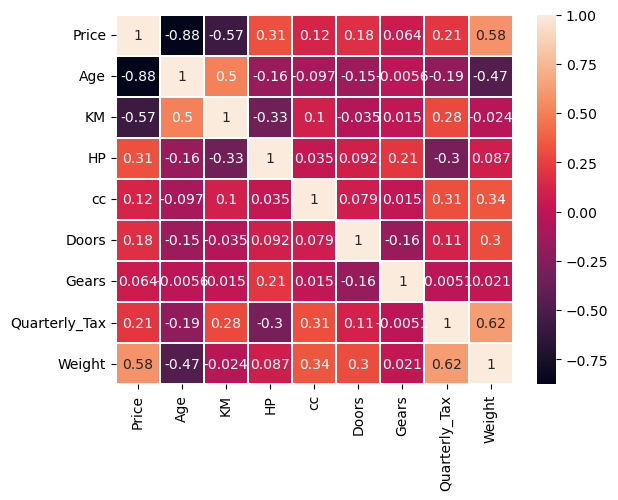

In [15]:
sns.heatmap(df.corr(),linewidth=0.2,annot=True)
plt.show()

* In above heatmap we can see 'Age' and 'Price' are highly negatively correlated.
* Weight and Quarterly_Tax is also highly correlated.
* Also price and weight are highly correlated.

## 3.Let's Explore different columns

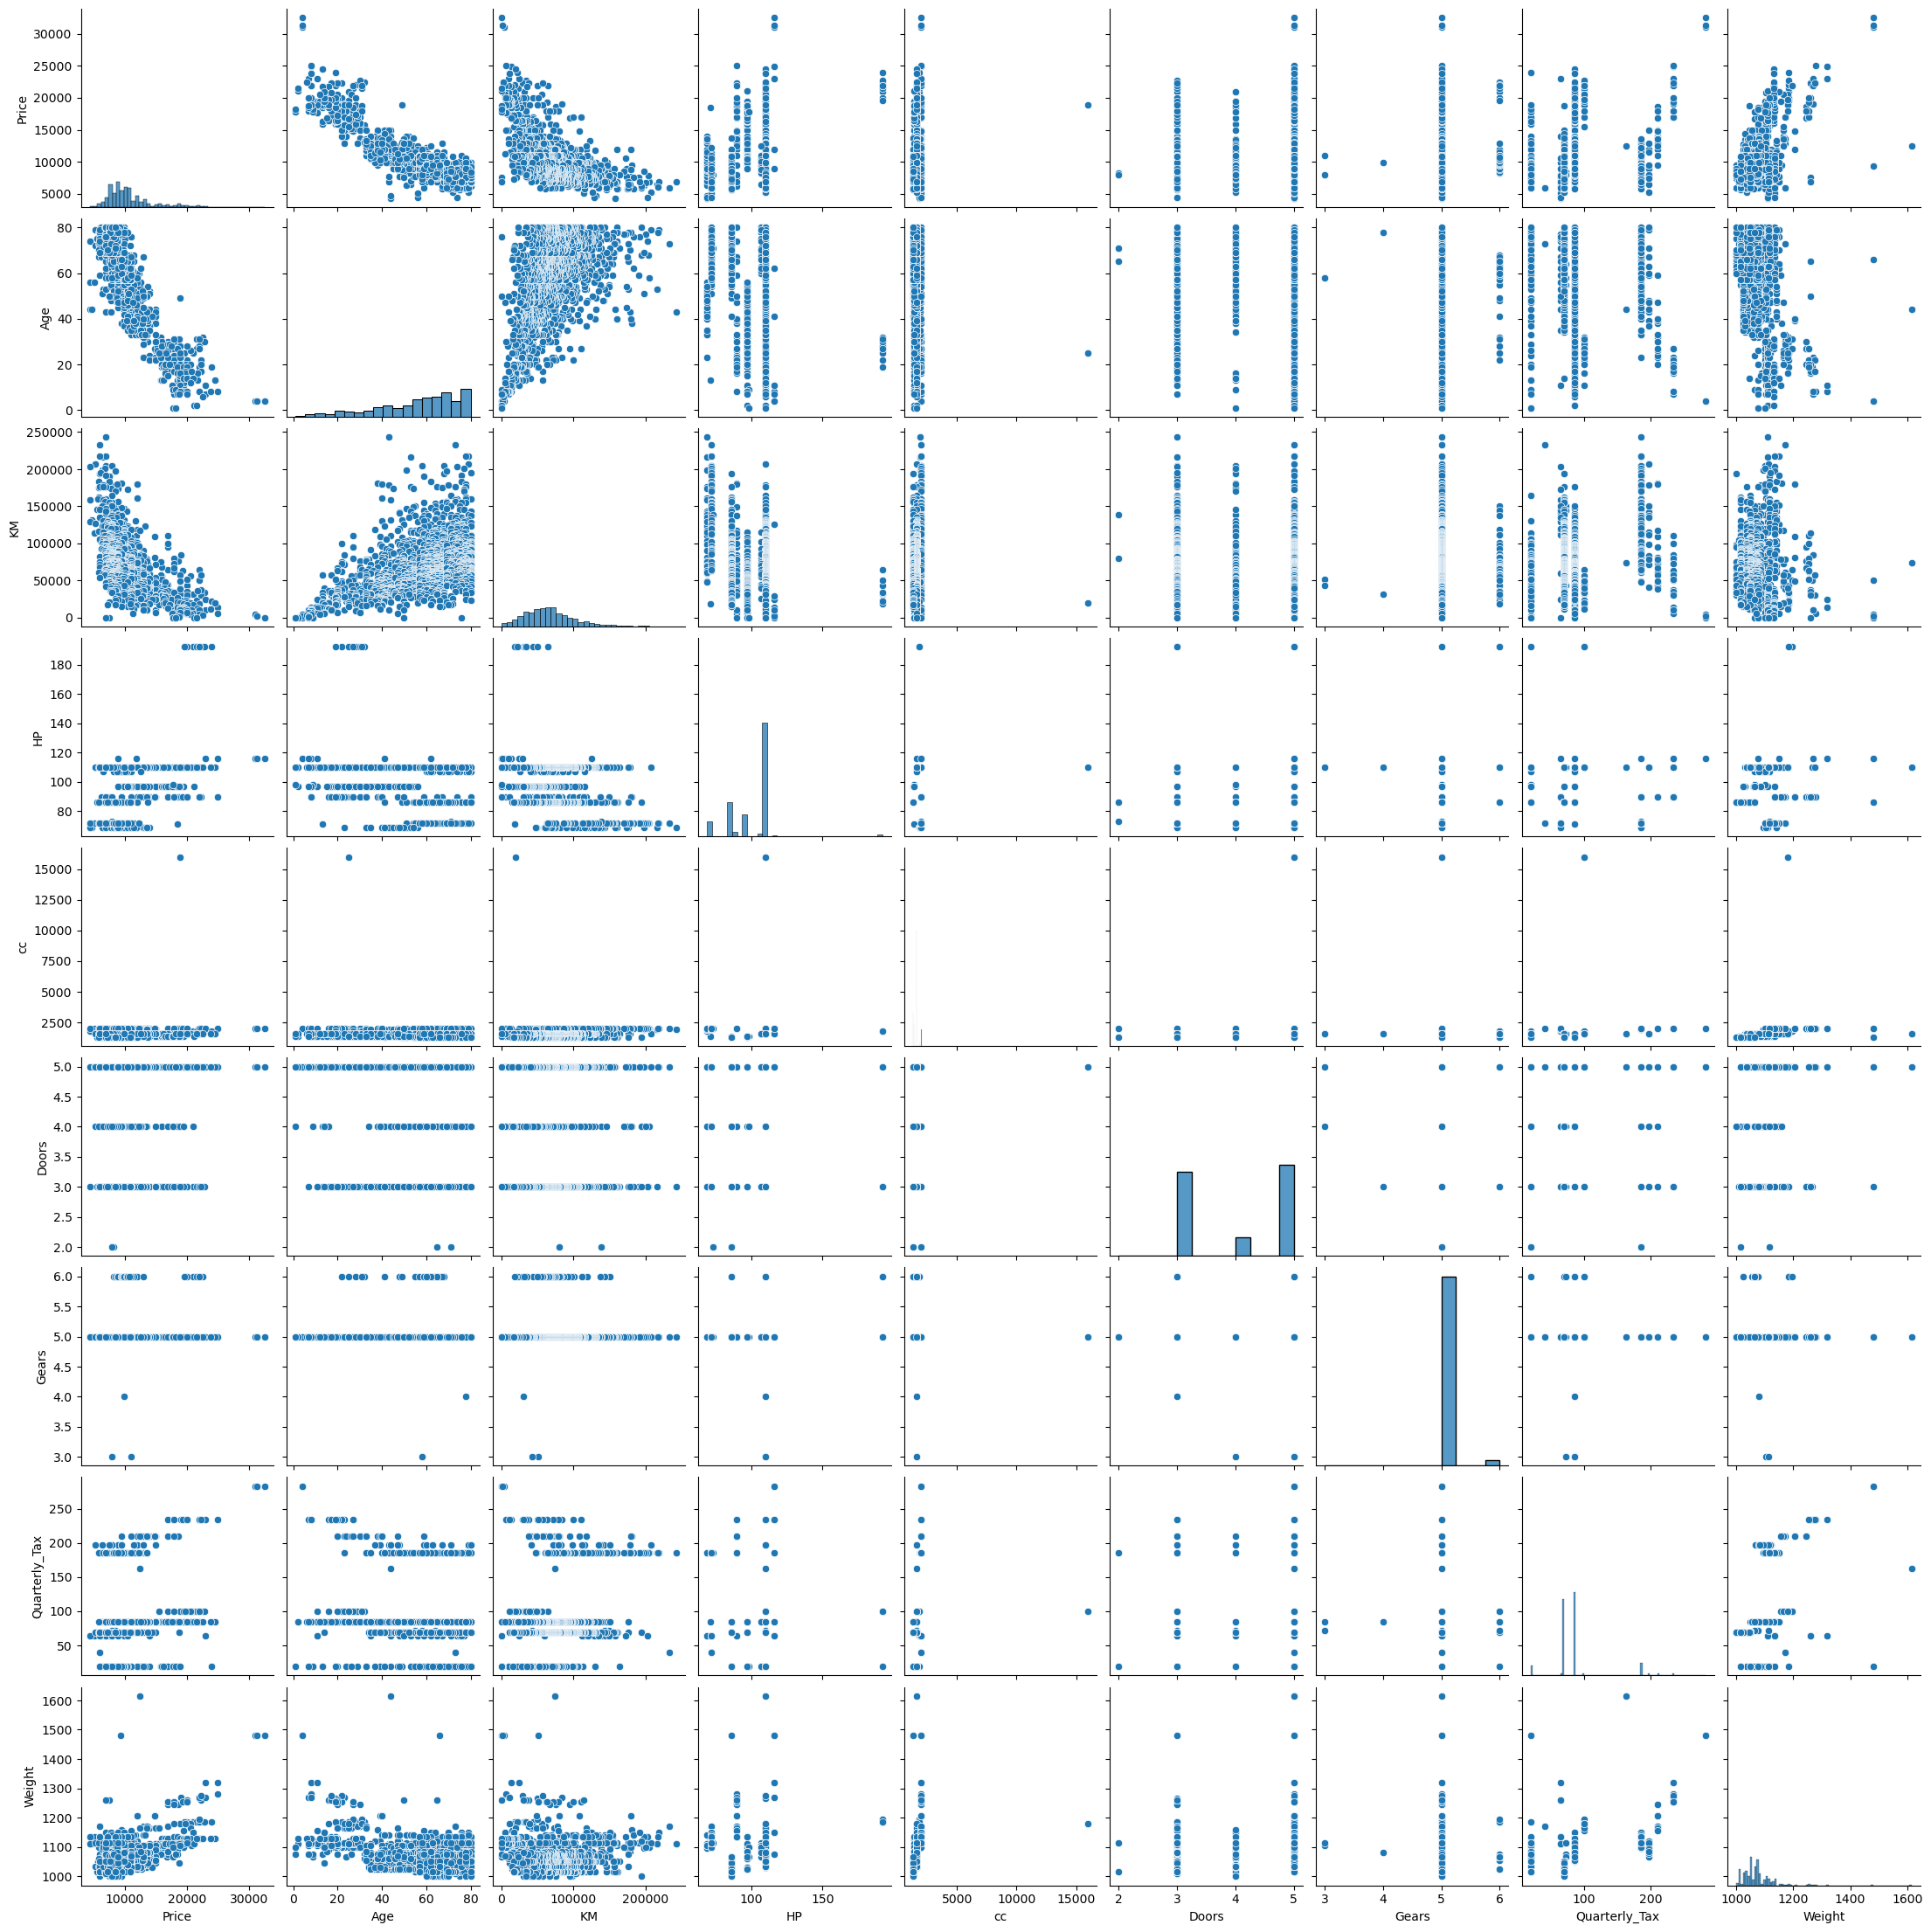

In [44]:
sns.pairplot(df)

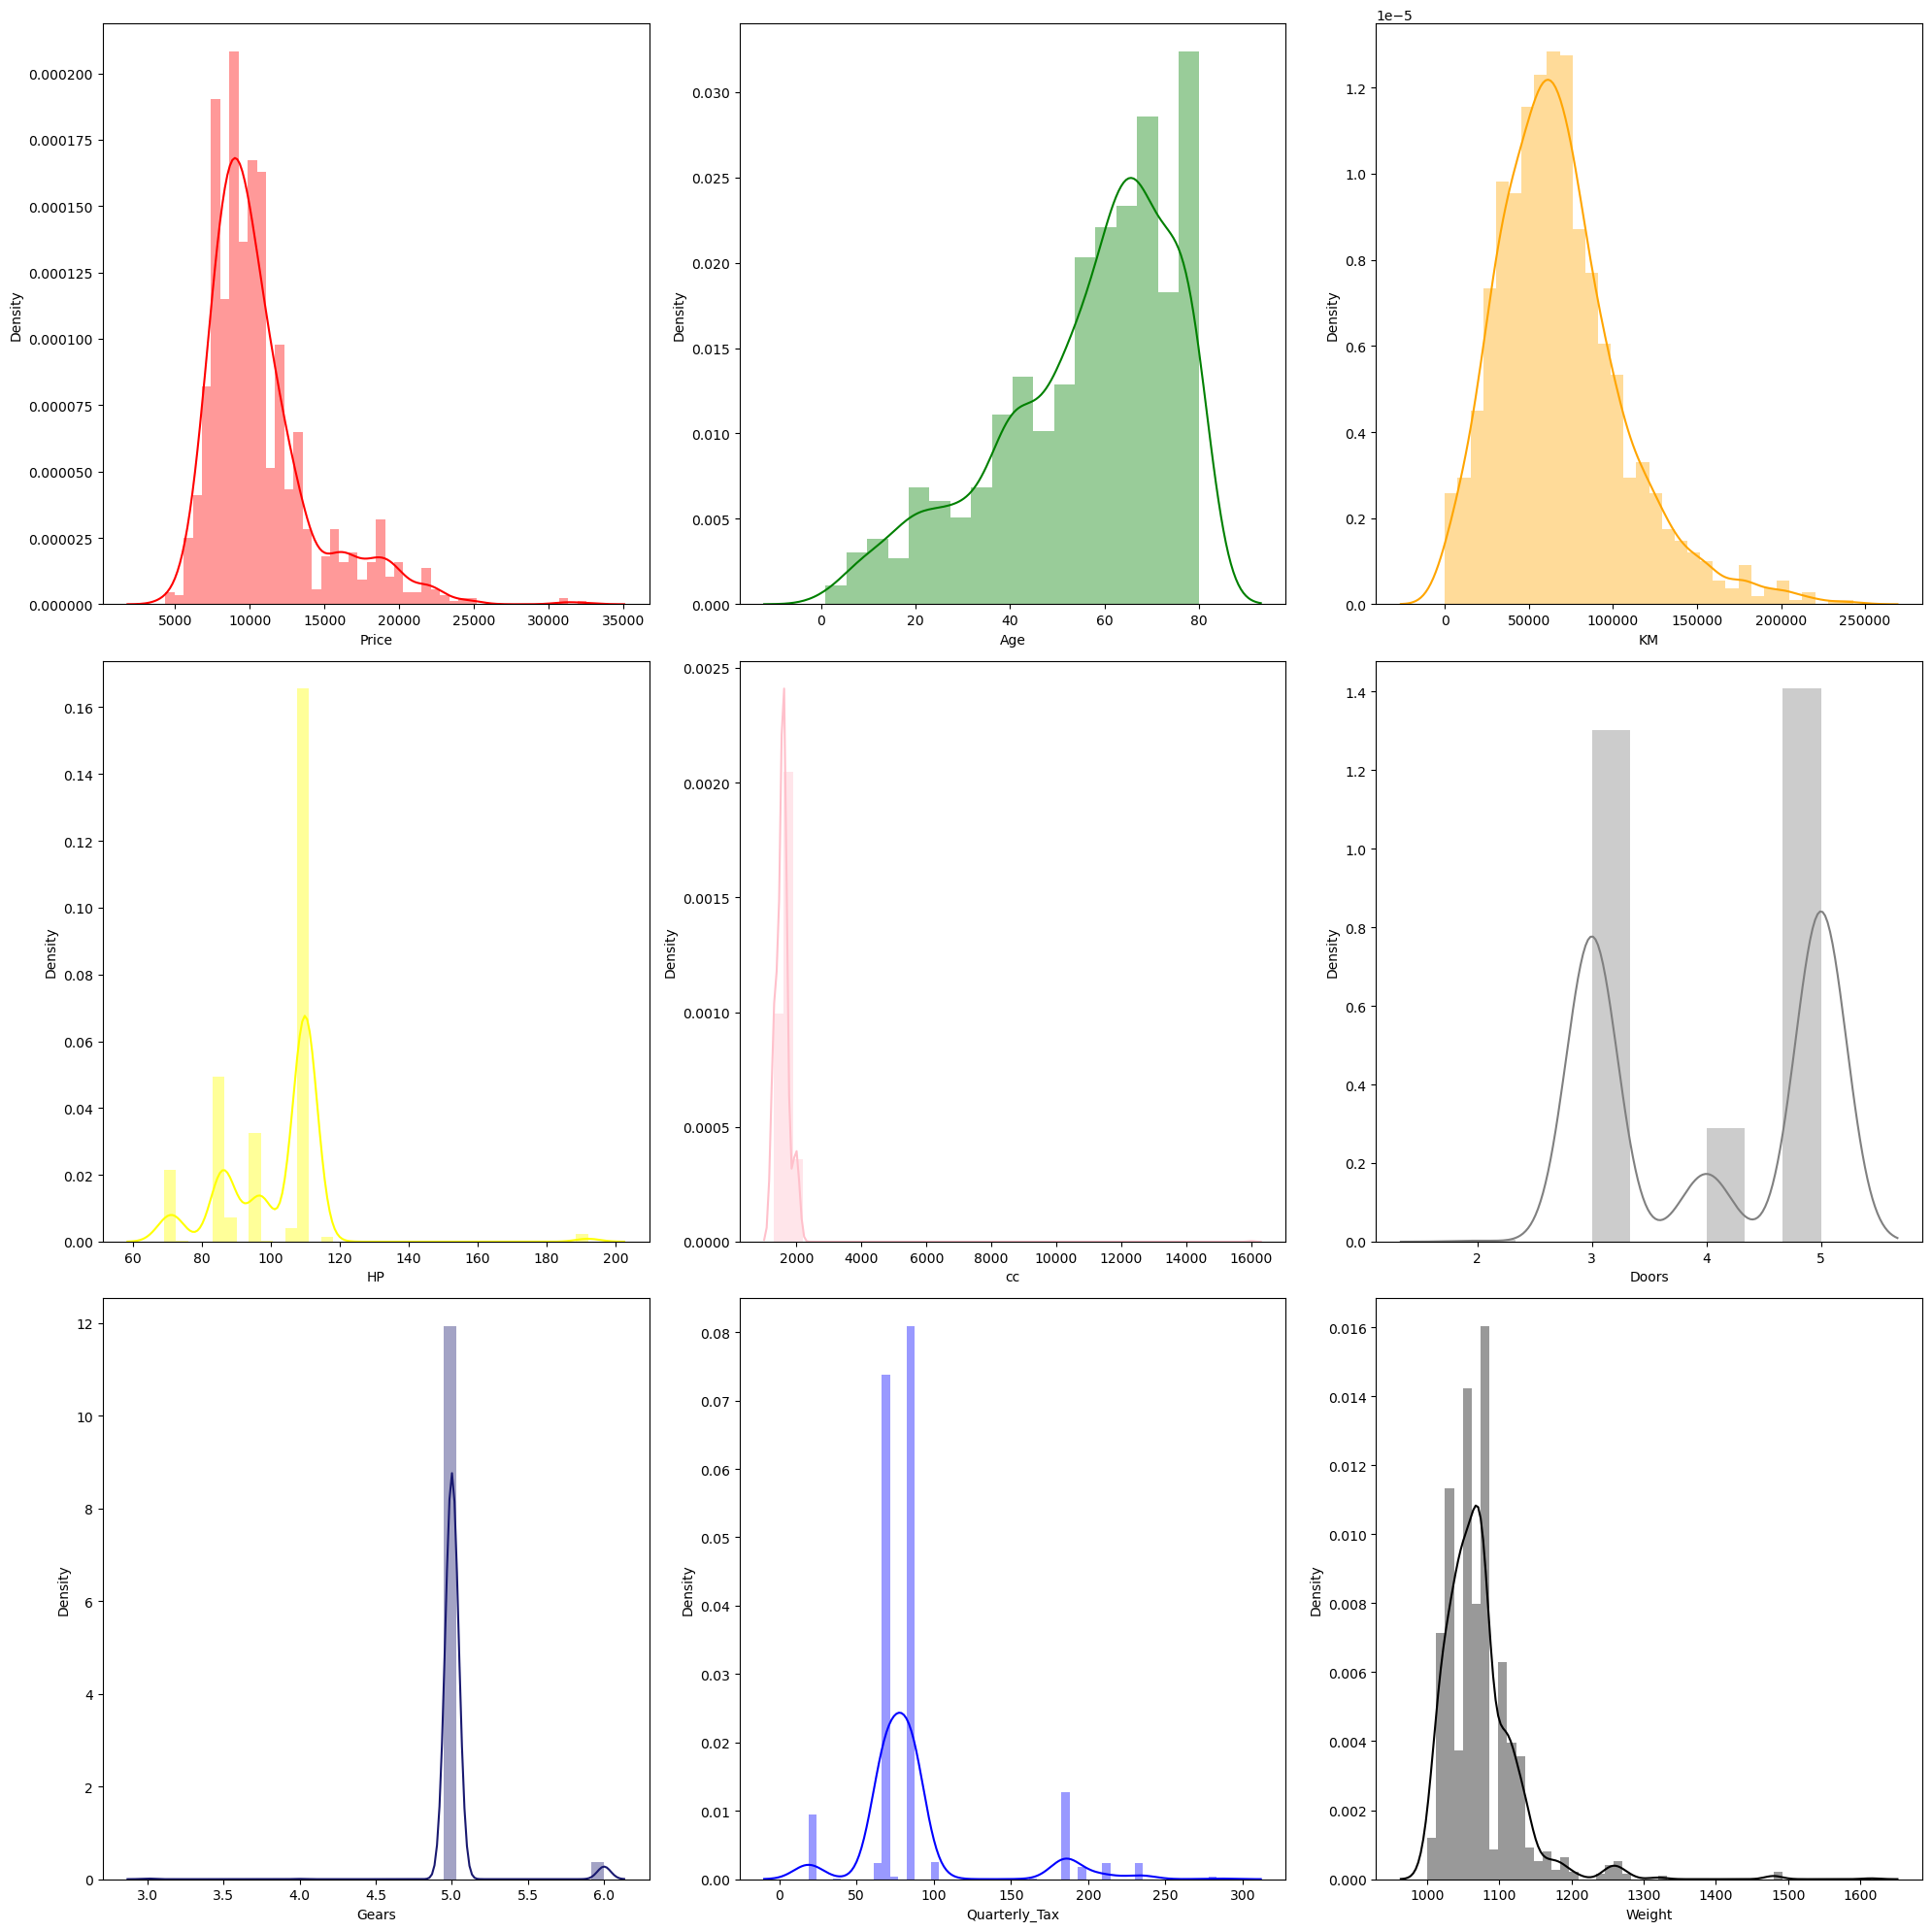

In [43]:
fig, axs = plt.subplots(3,3, figsize=(20,20))

sns.distplot(df['Price'],ax=axs[0][0],color='red')
sns.distplot(df['Age'],ax=axs[0][1], color='green')
sns.distplot(df['KM'],ax=axs[0][2], color='orange')
sns.distplot(df['HP'],ax=axs[1][0],color='yellow')
sns.distplot(df['cc'],ax=axs[1][1],color='pink')
sns.distplot(df['Doors'],ax=axs[1][2],color='gray')
sns.distplot(df['Gears'],ax=axs[2][0],color='midnightblue')
sns.distplot(df['Quarterly_Tax'],ax=axs[2][1],color='blue')
sns.distplot(df['Weight'],ax=axs[2][2], color='black')

plt.tight_layout()
plt.show()

## 4. Let's Build the model

### 4.1 Build without any transformation on data

In [28]:
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [29]:
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [30]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df).fit()

In [31]:
result1 = model1.summary()
result1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:09   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.2.Let's do outliers treatment and build the model

In [46]:
df1 = df.copy()

In [47]:
def box_plot(df):
    column = df.columns
    for col in column:
        fig, ax = plt.subplots()
        ax.boxplot(df[col])
        ax.set_title(col)
        plt.show()

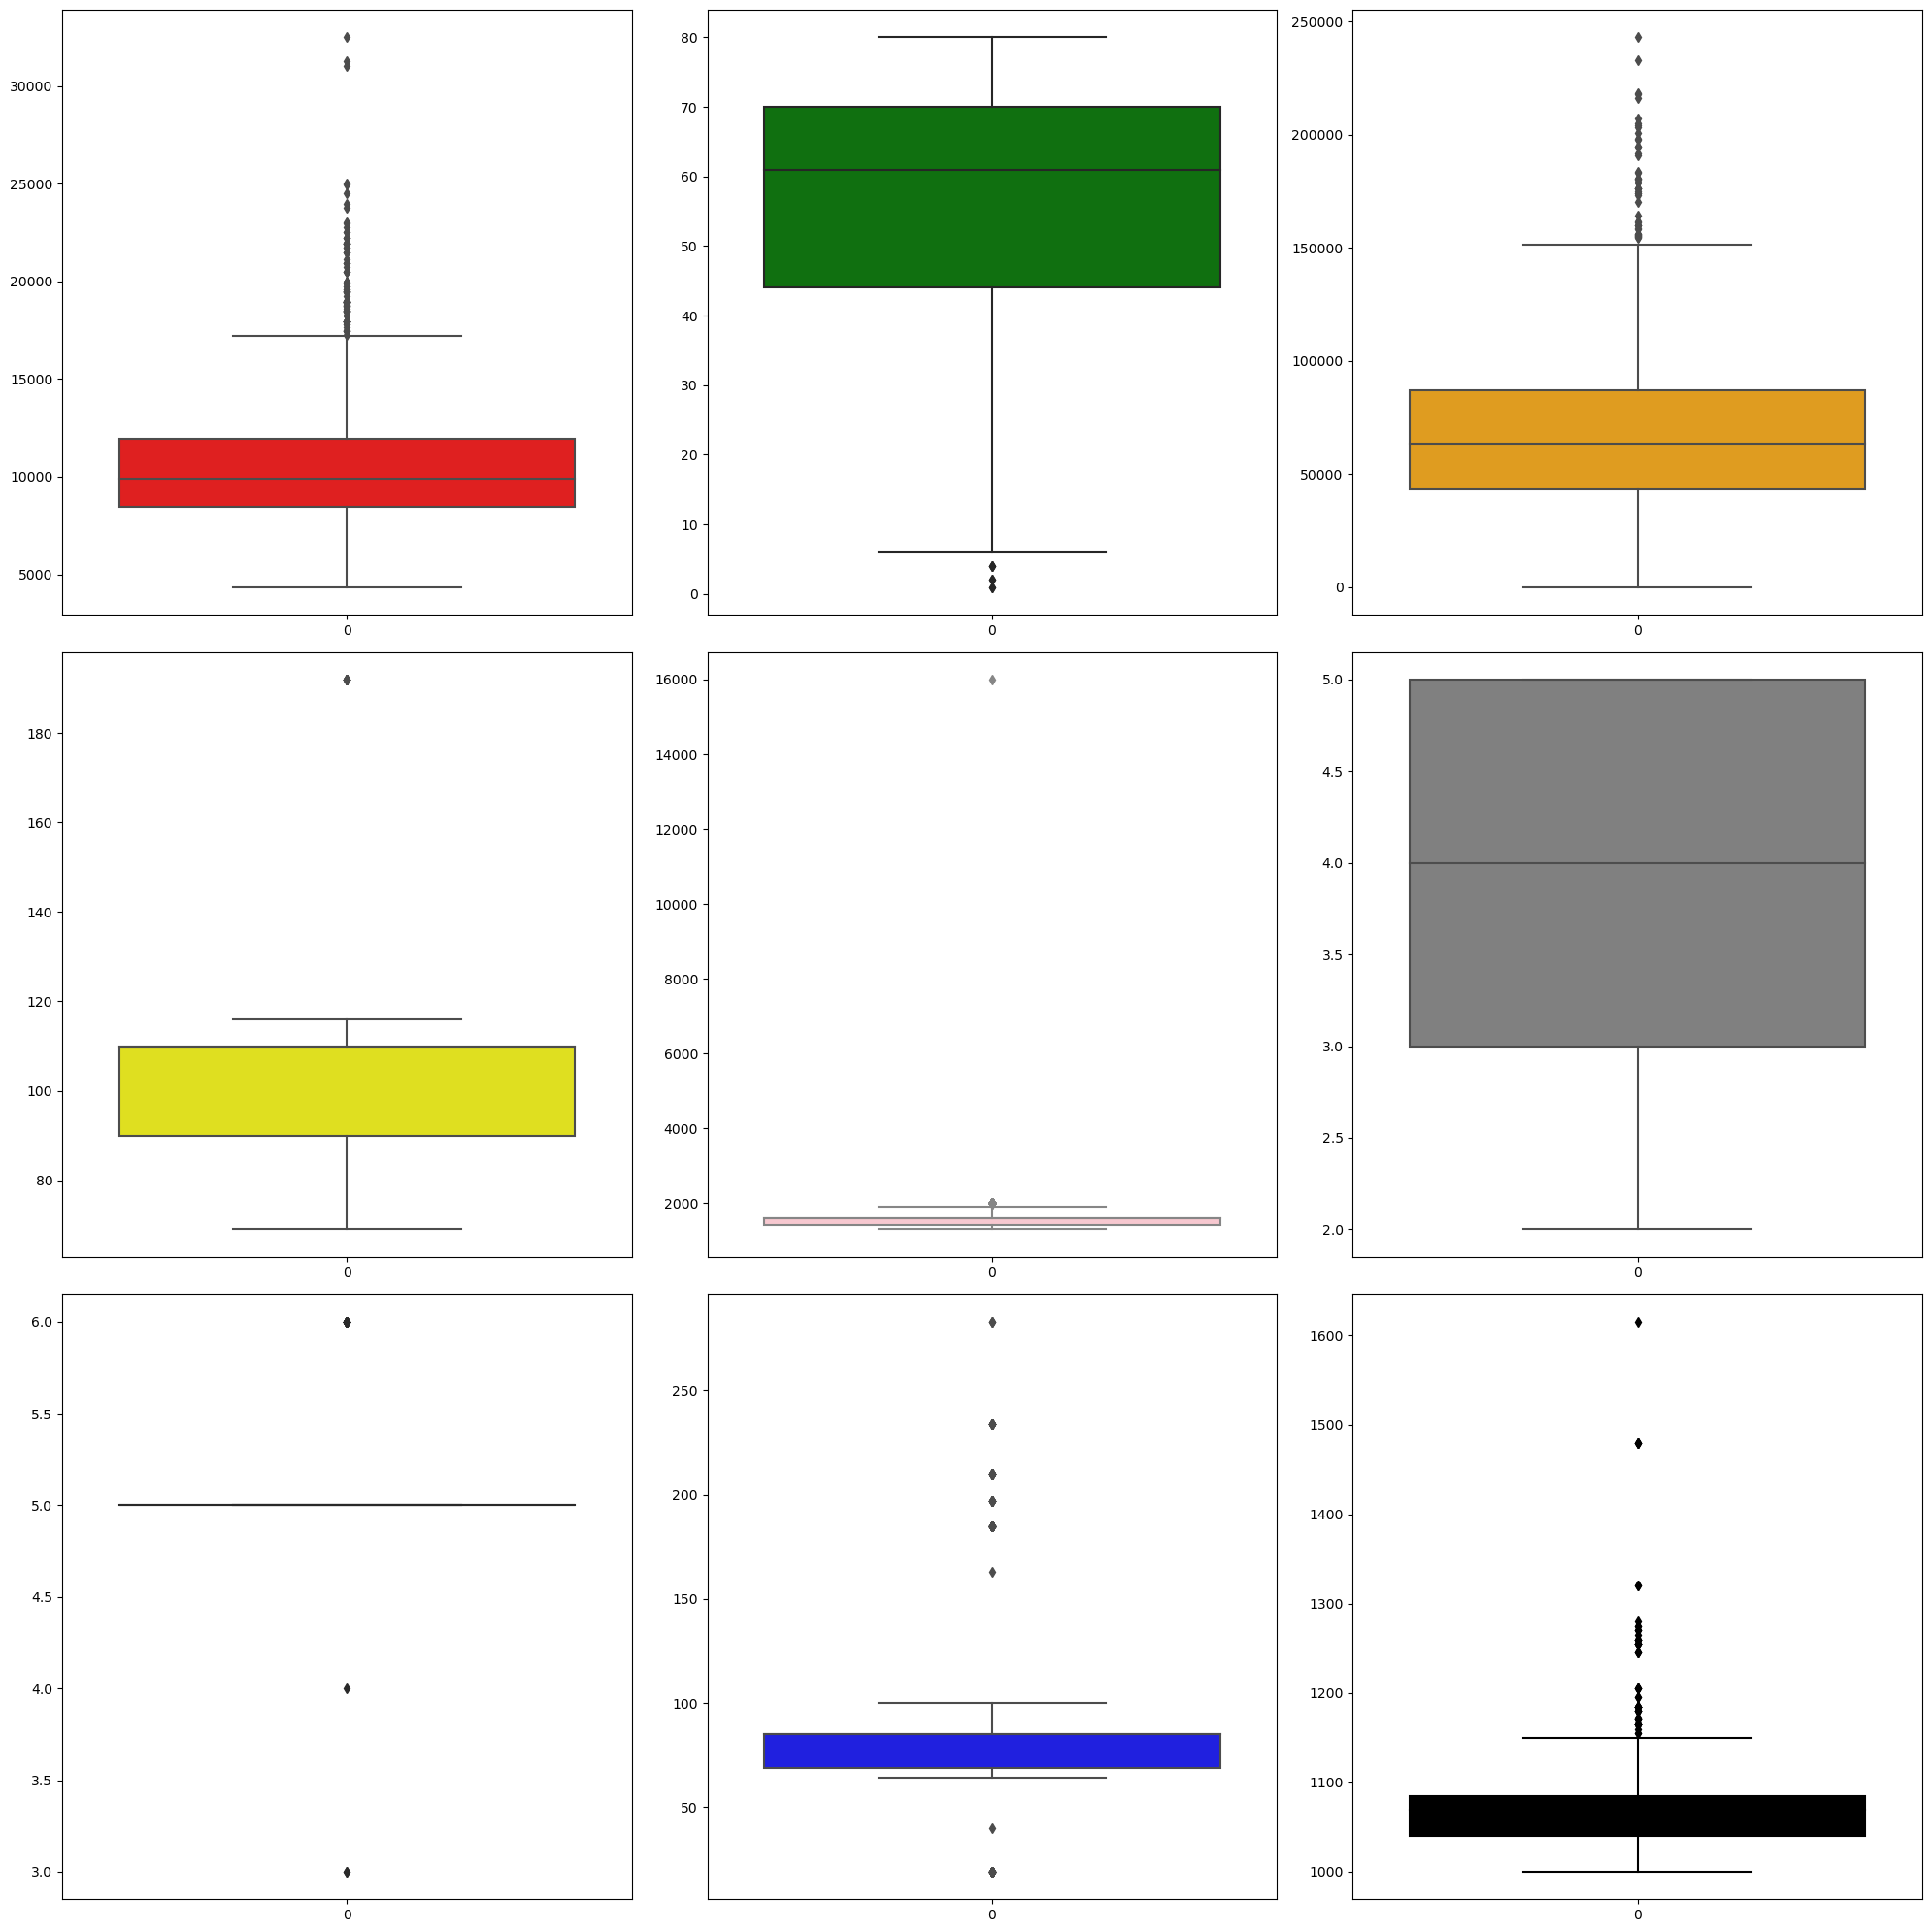

In [48]:
# Before outlier treatment boxplot of each column
fig, axs = plt.subplots(3,3, figsize=(20,20))

sns.boxplot(df['Price'],ax=axs[0][0],color='red')
sns.boxplot(df['Age'],ax=axs[0][1], color='green')
sns.boxplot(df['KM'],ax=axs[0][2], color='orange')
sns.boxplot(df['HP'],ax=axs[1][0],color='yellow')
sns.boxplot(df['cc'],ax=axs[1][1],color='pink')
sns.boxplot(df['Doors'],ax=axs[1][2],color='gray')
sns.boxplot(df['Gears'],ax=axs[2][0],color='midnightblue')
sns.boxplot(df['Quarterly_Tax'],ax=axs[2][1],color='blue')
sns.boxplot(df['Weight'],ax=axs[2][2], color='black')

plt.tight_layout()
plt.show()

In [49]:
# Let's define outlier treatment function
def outlier_treatment(df):
    for x in df.columns:
        Q1 = df[x].quantile(0.25)
        Q3 = df[x].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        df[x] = np.where(df[x] < lower_bound, lower_bound, df[x])
        df[x] = np.where(df[x] > upper_bound, upper_bound, df[x])
    
    return df

In [50]:
outlier_treatment(df1)

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500.0,23.0,46986.0,90.0,1900.0,3.0,5.0,109.0,1152.5
1,13750.0,23.0,72937.0,90.0,1900.0,3.0,5.0,109.0,1152.5
2,13950.0,24.0,41711.0,90.0,1900.0,3.0,5.0,109.0,1152.5
3,14950.0,26.0,48000.0,90.0,1900.0,3.0,5.0,109.0,1152.5
4,13750.0,30.0,38500.0,90.0,1900.0,3.0,5.0,109.0,1152.5
...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,1300.0,3.0,5.0,69.0,1025.0
1432,10845.0,72.0,19000.0,86.0,1300.0,3.0,5.0,69.0,1015.0
1433,8500.0,71.0,17016.0,86.0,1300.0,3.0,5.0,69.0,1015.0
1434,7250.0,70.0,16916.0,86.0,1300.0,3.0,5.0,69.0,1015.0


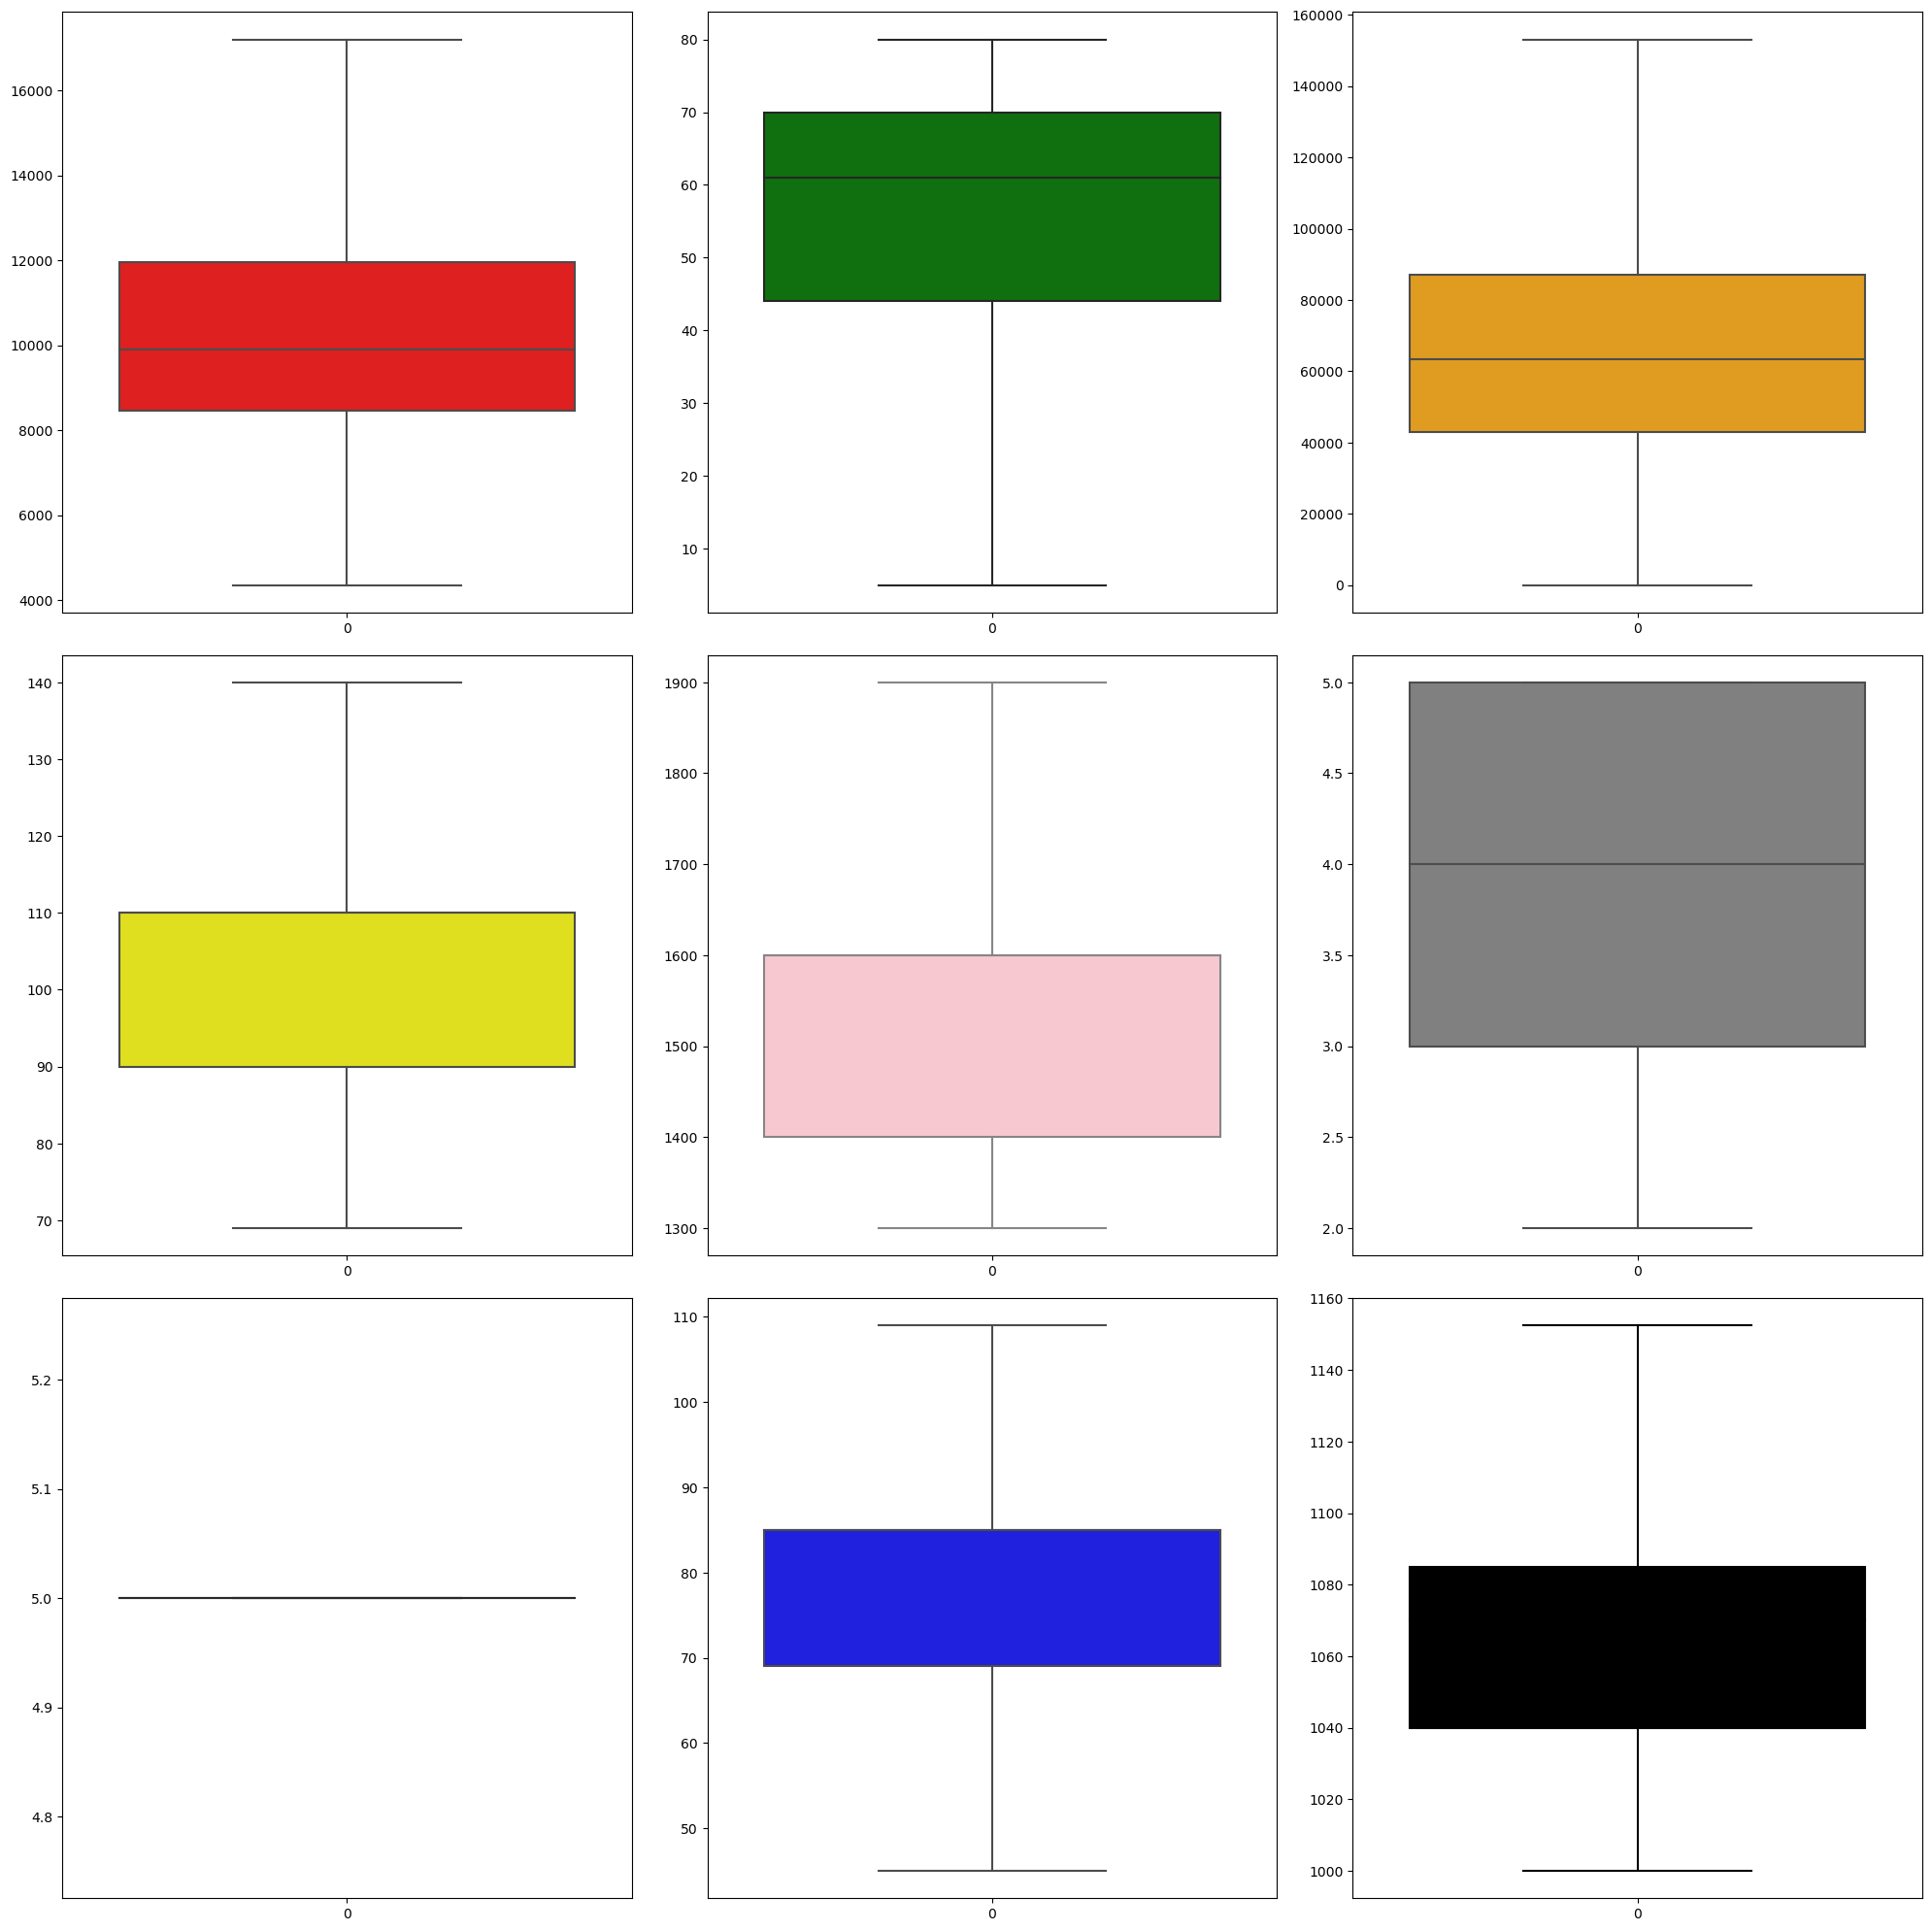

In [53]:
# After outlier treatment boxplot of each column
fig, axs = plt.subplots(3,3, figsize=(20,20))

sns.boxplot(df1['Price'],ax=axs[0][0],color='red')
sns.boxplot(df1['Age'],ax=axs[0][1], color='green')
sns.boxplot(df1['KM'],ax=axs[0][2], color='orange')
sns.boxplot(df1['HP'],ax=axs[1][0],color='yellow')
sns.boxplot(df1['cc'],ax=axs[1][1],color='pink')
sns.boxplot(df1['Doors'],ax=axs[1][2],color='gray')
sns.boxplot(df1['Gears'],ax=axs[2][0],color='midnightblue')
sns.boxplot(df1['Quarterly_Tax'],ax=axs[2][1],color='blue')
sns.boxplot(df1['Weight'],ax=axs[2][2], color='black')

plt.tight_layout()
plt.show()

## Split the data

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns='Price'), df['Price'], test_size=0.2, random_state=42)

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 8), (287, 8), (1148,), (287,))

In [38]:
# Let's build the second model
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df1).fit()

In [39]:
result2 = model2.summary()
result2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1320.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:14   Log-Likelihood:                -12071.
No. Observations:                1435   AIC:                         2.416e+04
Df Residuals:                    1427   BIC:                         2.420e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -177.3407     53.022     -3.345      0.001    -281.350     -73.332
Age            -106.1905      2.266    -46.862      0.000    -110.636    -101.745
KM               -0.0161      0.001    -13.935      0.000      -0.018      -0.014
HP               29.2491      2.516     11.625      0.000      24.314      34.185
cc               -2.6973      0.295     -9.146      0.000      -3.276      -2.119
Doors          -108.6892     34.449     -3.155      0.002    -176.265     -41.113
Gears          -886.7036    265.109     -3.345      0.001   -1406.748    -366.659
Quarterly_Tax    13.5611      2.739      4.950      0.000       8.187      18.935
Weight           21.2916      1.530     13.913      0.000      18.290      24.293
==============================================================================
Omnibus:                       52.544   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.555
Skew:                          -0.115   Prob(JB):                     3.67e-30
Kurtosis:                       4.488   Cond. No.                     3.80e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
### Let's scaled the data and build the model
from sklearn.preprocessing import StandardScaler

In [41]:
df2 = df.copy()

In [42]:
std = StandardScaler()

In [43]:
def Standardscaler(df):
    for col in df.columns:
        df[col]=std.fit_transform(df[[col]])
    return df

In [44]:
Standardscaler(df2)

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688
...,...,...,...,...,...,...,...,...,...
1431,-0.892845,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1432,0.034396,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1433,-0.615643,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1434,-0.962145,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747


In [45]:
model3 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df2).fit()

In [46]:
result3 = model3.summary()
result3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:15   Log-Likelihood:                -612.46
No. Observations:                1435   AIC:                             1243.
Df Residuals:                    1426   BIC:                             1290.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.561e-17      0.010  -1.59e-15      1.000      -0.019       0.019
Age              -0.6261      0.013    -46.552      0.000      -0.652      -0.600
KM               -0.2154      0.013    -16.552      0.000      -0.241      -0.190
HP                0.1311      0.012     11.210      0.000       0.108       0.154
cc               -0.0139      0.011     -1.316      0.188      -0.035       0.007
Doors            -0.0002      0.011     -0.023      0.982      -0.021       0.020
Gears             0.0312      0.010      3.035      0.002       0.011       0.051
Quarterly_Tax     0.0438      0.015      2.944      0.003       0.015       0.073
Weight            0.2441      0.015     15.761      0.000       0.214       0.274
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

In [48]:
df3 = df.copy()
df3.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [49]:
minmax = MinMaxScaler()

In [50]:
def Minmax(df):
    for col in df.columns:
        df[col]=minmax.fit_transform(df[[col]])
    return df

In [51]:
Minmax(df3)

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,0.333925,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,0.341030,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,0.376554,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,0.333925,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423
...,...,...,...,...,...,...,...,...,...
1431,0.111901,0.860759,0.084539,0.138211,0.000000,0.333333,0.666667,0.189394,0.040650
1432,0.230728,0.898734,0.078186,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1433,0.147425,0.886076,0.070021,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1434,0.103020,0.873418,0.069609,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390


In [52]:
model4 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df3).fit()

In [53]:
result4 = model4.summary()
result4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:16   Log-Likelihood:                 2335.8
No. Observations:                1435   AIC:                            -4654.
Df Residuals:                    1426   BIC:                            -4606.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3837      0.015     24.829      0.000       0.353       0.414
Age              -0.3416      0.007    -46.552      0.000      -0.356      -0.327
KM               -0.1790      0.011    -16.552      0.000      -0.200      -0.158
HP                0.1380      0.012     11.210      0.000       0.114       0.162
cc               -0.0619      0.047     -1.316      0.188      -0.154       0.030
Doors         -9.807e-05      0.004     -0.023      0.982      -0.008       0.008
Gears             0.0637      0.021      3.035      0.002       0.023       0.105
Quarterly_Tax     0.0362      0.012      2.944      0.003       0.012       0.060
Weight            0.3682      0.023     15.761      0.000       0.322       0.414
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Let's remove those columns which are negatively correlated
df4 = df.copy()
df4.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


<Axes: >

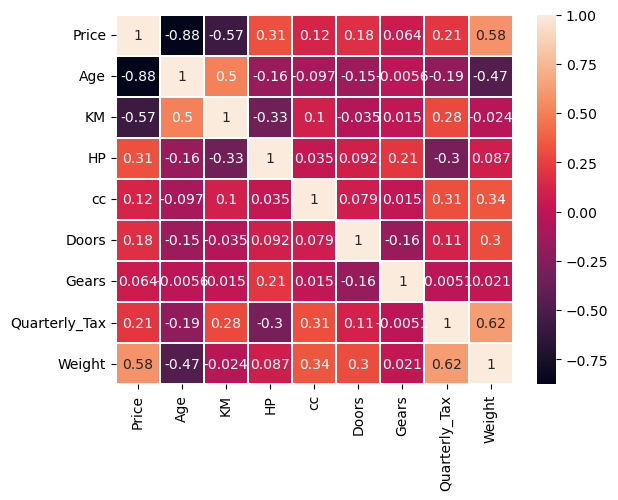

In [55]:
sns.heatmap(df4.corr(),linewidth=0.1,annot=True)

In [56]:
# Let's drop the Gears and Quarterly_Tax
df4.drop(columns=['Quarterly_Tax', 'Gears','cc'])

,Price,Age,KM,HP,Doors,Weight
0,13500,23,46986,90,3,1165
1,13750,23,72937,90,3,1165
2,13950,24,41711,90,3,1165
3,14950,26,48000,90,3,1165
4,13750,30,38500,90,3,1170
...,...,...,...,...,...,...
1431,7500,69,20544,86,3,1025
1432,10845,72,19000,86,3,1015
1433,8500,71,17016,86,3,1015
1434,7250,70,16916,86,3,1015


In [57]:
model5 = smf.ols('Price~Age+KM+HP+Doors+Quarterly_Tax+Weight', data=df3).fit()

In [58]:
result5 = model5.summary()
result5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1480.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:17   Log-Likelihood:                 2330.3
No. Observations:                1435   AIC:                            -4647.
Df Residuals:                    1428   BIC:                            -4610.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4258      0.007     58.716      0.000       0.412       0.440
Age              -0.3421      0.007    -46.483      0.000      -0.357      -0.328
KM               -0.1776      0.011    -16.455      0.000      -0.199      -0.156
HP                0.1455      0.012     12.194      0.000       0.122       0.169
Doors            -0.0025      0.004     -0.590      0.555      -0.011       0.006
Quarterly_Tax     0.0358      0.012      2.929      0.003       0.012       0.060
Weight            0.3638      0.023     15.724      0.000       0.318       0.409
==============================================================================
Omnibus:                      145.933   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.411
Skew:                          -0.206   Prob(JB):                    2.78e-204
Kurtosis:                       6.938   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model6 = LinearRegression()

In [73]:
model6.fit(X_train, y_train)

LinearRegression()

In [74]:
train_pred = model6.predict(X_train)
test_pred = model6.predict(X_test)

In [75]:
from sklearn.metrics import r2_score

In [78]:
train_r2_score_lr = r2_score(y_train, train_pred)
test_r2_score_lr = r2_score(y_test, test_pred)
train_r2_score_lr, test_r2_score_lr

(0.8475539837941763, 0.8223199117067373)

In [81]:
n = len(df1)
p = len(df1.columns)-1
n, p

(1435, 8)

In [84]:
train_adj_r2_lr = 1 - (1 - train_r2_score_lr) * ((n - 1)/(n - p - 1))
test_adj_r2_lr = 1 - (1 - test_r2_score_lr) * ((n - 1)/(n - p - 1))
train_adj_r2_lr, test_adj_r2_lr

(0.846698746676612, 0.8213231089673642)

## Lasso Regression

In [86]:
from sklearn.linear_model import Lasso

In [87]:
lasso = Lasso(alpha=0.3)

In [88]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.3)

In [89]:
train_pred = lasso.predict(X_train)
test_pred = lasso.predict(X_test)

In [90]:
train_r2_score_lasso = r2_score(y_train, train_pred)
test_r2_score_lasso = r2_score(y_test, test_pred)
train_r2_score_lasso, test_r2_score_lasso

(0.8475539733976583, 0.8223265440536659)

In [91]:
train_adj_r2_lasso = 1 - (1 - train_r2_score_lasso) * ((n - 1)/(n - p - 1))
test_adj_r2_lasso = 1 - (1 - test_r2_score_lasso) * ((n - 1)/(n - p - 1))
train_adj_r2_lasso, test_adj_r2_lasso

(0.8466987362217685, 0.8213297785224102)

## Ridge Regression

In [95]:
from sklearn.linear_model import Ridge

In [108]:
ridge = Ridge(alpha=0.3)

In [109]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.3)

In [110]:
train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

In [111]:
train_r2_score_ridge = r2_score(y_train, train_pred)
test_r2_score_ridge = r2_score(y_test, test_pred)
train_r2_score_ridge, test_r2_score_ridge

(0.8475539835033857, 0.8223209142592685)

In [112]:
train_adj_r2_ridge = 1 - (1 - train_r2_score_ridge) * ((n - 1)/(n - p - 1))
test_adj_r2_ridge = 1 - (1 - test_r2_score_ridge) * ((n - 1)/(n - p - 1))
train_adj_r2_ridge, test_adj_r2_ridge

(0.8466987463841902, 0.8213241171443134)

## Elsatic Net

In [114]:
from sklearn.linear_model import ElasticNet

In [115]:
els = ElasticNet()

In [116]:
els.fit(X_train, y_train)

ElasticNet()

In [117]:
train_pred = els.predict(X_train)
test_pred = els.predict(X_test)

In [118]:
train_r2_score_els = r2_score(y_train, train_pred)
test_r2_score_els = r2_score(y_test, test_pred)
train_r2_score_els, test_r2_score_els

(0.8471848247945108, 0.8230506717086402)

In [119]:
train_adj_r2_els = 1 - (1 - train_r2_score_els) * ((n - 1)/(n - p - 1))
test_adj_r2_els = 1 - (1 - test_r2_score_els) * ((n - 1)/(n - p - 1))
train_adj_r2_els, test_adj_r2_els

(0.8463275166587156, 0.8220579686046213)

In [59]:
matrix_df = pd.DataFrame({'rsquared':[model1.rsquared, model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared],
                         'rsquared_adj':[model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj,model5.rsquared_adj]},
                         index=['model1', 'model2','model3','model4','model5'])

In [121]:
matrix_df.sort_values('rsquared', ascending=False)

,rsquared,rsquared_adj
model2,0.866181,0.865524
model1,0.862520,0.861749
model4,0.862520,0.861749
model3,0.862520,0.861749
model5,0.861453,0.860871


In [122]:
final_metric = pd.DataFrame({
    'rsquared':[model2.rsquared, test_r2_score_lr, test_r2_score_lasso, test_r2_score_ridge, test_r2_score_els],
    'rsquared_adj':[model2.rsquared_adj, test_adj_r2_lr, test_adj_r2_lasso, test_adj_r2_ridge, test_adj_r2_els]
}, index=['OLS', 'LinearRegression', 'Lasso', 'Ridge', 'ElasticNet'],
)

In [124]:
final_metric.sort_values('rsquared_adj', ascending=False)

,rsquared,rsquared_adj
OLS,0.866181,0.865524
ElasticNet,0.823051,0.822058
Lasso,0.822327,0.821330
Ridge,0.822321,0.821324
LinearRegression,0.822320,0.821323


# Conclusion

* We have tried different models with different transformation on data
* But we we found that model2 performed well because rsquared and adjusted rsquared are maximum with respect to rest of the model.
* Then I check all models performance and still I got maximum r2_score found in OLS.